In [1]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

(372, 425)

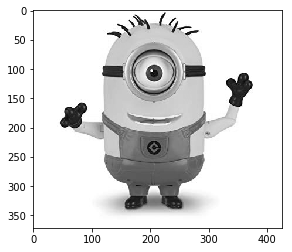

In [38]:
img = scipy.ndimage.imread('images/minion.jpg',flatten=True)
plt.imshow(img,cmap="gray")
img.shape

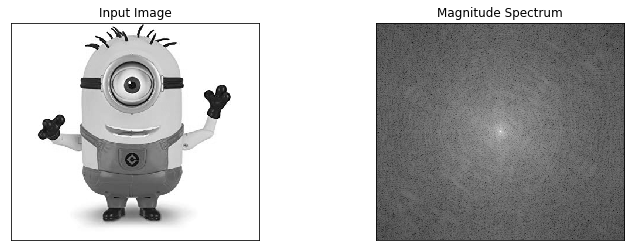

In [120]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplots(1,2,figsize=(12,4))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

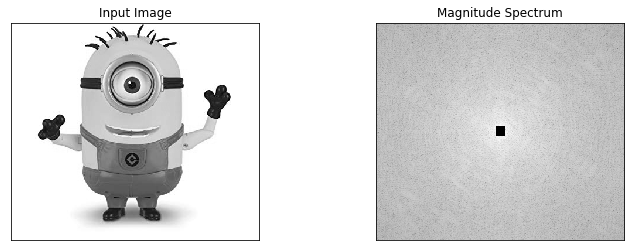

In [121]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# Remove the low frequencies by masking with a rectangular window
# High Pass Filter (HPF)

K = 8
fshift[crow-K:crow+K, ccol-K:ccol+K] = 0.0001
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplots(1,2,figsize=(12,4))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

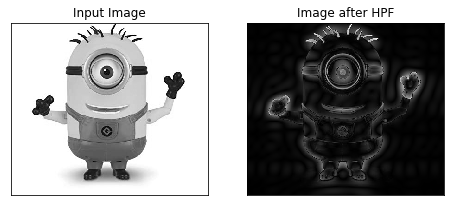

In [122]:
# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.subplots(1,2,figsize=(12,4))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.show()

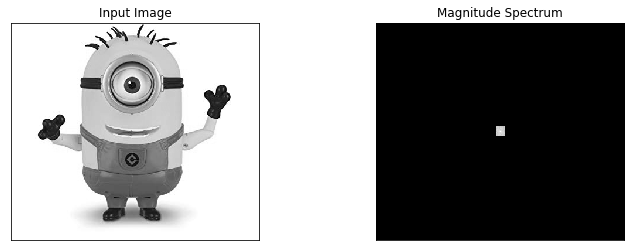

In [123]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

K1=int(rows/2-8)
K2=int(cols/2-8)
fshift[0:K1, 0:cols] = 0.0001
fshift[-K1:rows, 0:cols] = 0.0001
fshift[0:rows, 0:K2] = 0.0001
fshift[0:rows, -K2:cols] = 0.0001

magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplots(1,2,figsize=(12,4))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

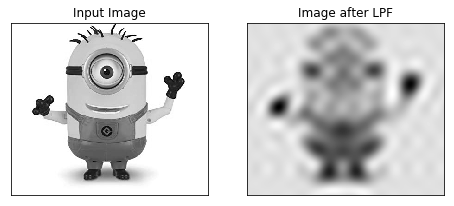

In [124]:
# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.subplots(1,2,figsize=(12,4))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.show()

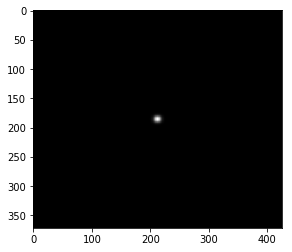

In [185]:
x, y = np.meshgrid(np.linspace(-1,1,cols), np.linspace(-1,1,rows))
d = np.sqrt(x*x+y*y)
sigma, mu = .02, 0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
plt.imshow(g,cmap="gray")

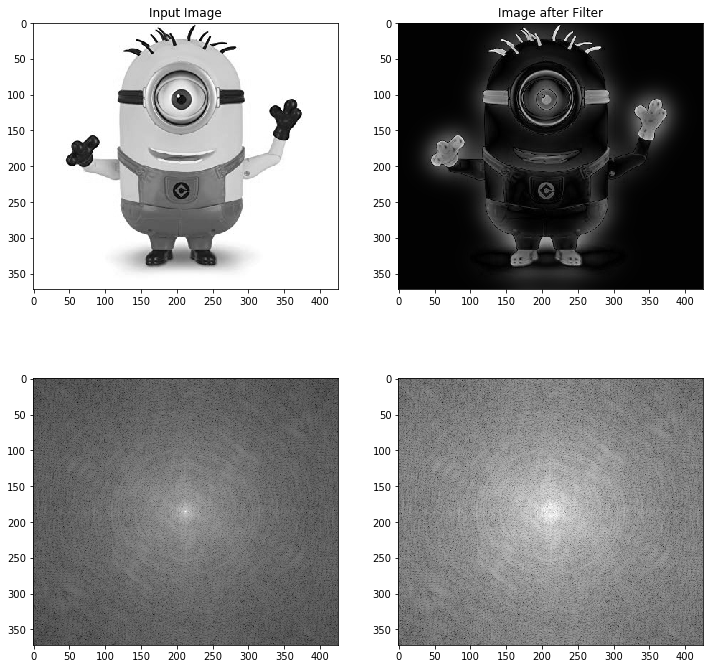

In [186]:
f = np.fft.fft2(img)
fs = np.fft.fftshift(f)

f_alts = (1-g) * fs
f_alt = np.fft.ifftshift(f_alts)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_alts)
img_back = np.abs(img_back)

fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].imshow(img, cmap = 'gray')
ax[0,0].set_title('Input Image')
ax[0,1].imshow(img_back, cmap = 'gray')
ax[0,1].set_title('Image after Filter')

mag_f = 20*np.log(np.abs(fs))
mag_f_alt = 20*np.log(np.abs(f_alts))

ax[1,0].imshow(mag_f, cmap="gray")
ax[1,1].imshow(mag_f_alt, cmap="gray");
